In [6]:
import sys
sys.path.append('../src') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve_nsga2, calculate_route_distance

In [7]:
distance_df = pd.read_csv(r'C:\Users\ASUS\mTSP\data\HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48


In [8]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)


=== Số người (m) = 1 ===
Hội tụ tại thế hệ: 300
Tổng quãng đường: 1553.04
Tuyến dài nhất (fitness): 1553.04
Chênh lệch giữa các tuyến (Balance metric): 0.00
Thời gian thực thi: 12.3231 giây
Tốc độ hội tụ: 0.0956 đơn vị/gen
- Tuyến 1 (1553.04): [0, 117, 33, 35, 111, 22, 56, 67, 30, 37, 107, 122, 110, 5, 19, 64, 77, 99, 66, 93, 83, 87, 108, 92, 106, 16, 105, 95, 51, 44, 24, 15, 43, 18, 118, 69, 76, 32, 90, 86, 103, 48, 9, 17, 49, 3, 27, 29, 13, 88, 40, 124, 55, 52, 54, 45, 73, 75, 36, 78, 62, 98, 120, 72, 85, 4, 21, 20, 61, 113, 11, 68, 10, 39, 104, 81, 47, 97, 8, 6, 102, 50, 94, 28, 126, 38, 119, 82, 79, 109, 115, 26, 114, 7, 14, 1, 91, 31, 42, 70, 96, 80, 84, 58, 63, 12, 41, 53, 100, 123, 125, 59, 89, 65, 25, 71, 2, 112, 74, 121, 46, 101, 57, 34, 60, 116, 23, 0]


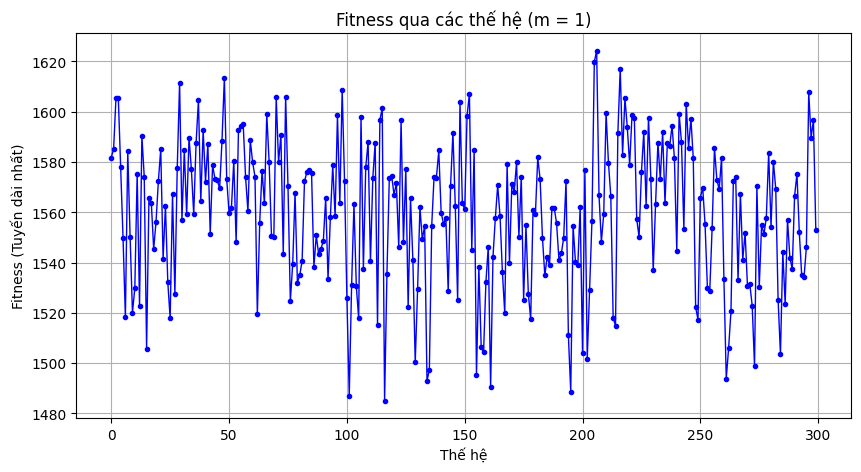


=== Số người (m) = 2 ===
Hội tụ tại thế hệ: 300
Tổng quãng đường: 1608.11
Tuyến dài nhất (fitness): 806.34
Chênh lệch giữa các tuyến (Balance metric): 2.29
Thời gian thực thi: 12.5561 giây
Tốc độ hội tụ: 0.1713 đơn vị/gen
- Tuyến 1 (806.34): [0, 59, 70, 56, 3, 18, 27, 21, 11, 24, 31, 55, 99, 115, 100, 75, 101, 93, 108, 118, 41, 45, 33, 86, 90, 50, 5, 51, 87, 68, 40, 6, 37, 85, 92, 26, 102, 89, 124, 46, 66, 25, 36, 39, 111, 88, 17, 22, 96, 9, 81, 104, 113, 48, 54, 61, 109, 53, 42, 69, 98, 35, 116, 126, 0]
- Tuyến 2 (801.77): [0, 82, 23, 122, 106, 30, 60, 52, 67, 72, 43, 19, 103, 62, 10, 79, 64, 65, 20, 15, 12, 14, 97, 78, 119, 2, 120, 8, 83, 28, 4, 29, 105, 44, 58, 49, 74, 80, 32, 107, 63, 94, 76, 13, 57, 110, 91, 117, 125, 121, 16, 114, 1, 95, 112, 7, 47, 71, 77, 73, 34, 38, 123, 84, 0]


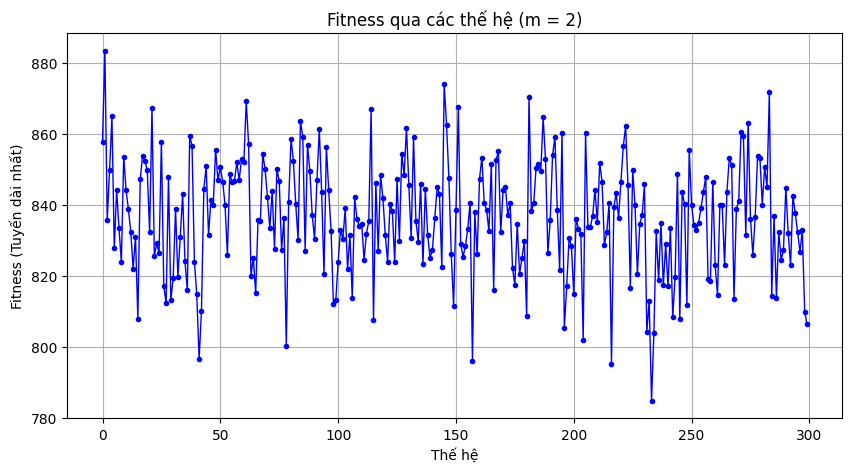


=== Số người (m) = 3 ===
Hội tụ tại thế hệ: 300
Tổng quãng đường: 1652.95
Tuyến dài nhất (fitness): 558.23
Chênh lệch giữa các tuyến (Balance metric): 6.44
Thời gian thực thi: 12.5688 giây
Tốc độ hội tụ: 0.1626 đơn vị/gen
- Tuyến 1 (542.58): [0, 55, 34, 91, 10, 121, 49, 122, 39, 37, 23, 46, 52, 3, 11, 79, 70, 68, 67, 22, 25, 54, 120, 97, 117, 75, 58, 72, 32, 28, 104, 60, 116, 40, 87, 69, 21, 27, 16, 105, 106, 83, 51, 0]
- Tuyến 2 (552.14): [0, 118, 125, 31, 8, 111, 48, 45, 50, 38, 17, 61, 84, 29, 76, 53, 74, 9, 59, 7, 42, 71, 98, 95, 99, 89, 115, 26, 35, 110, 56, 124, 123, 13, 44, 63, 112, 101, 114, 96, 92, 6, 43, 0]
- Tuyến 3 (558.23): [0, 90, 41, 73, 2, 86, 47, 65, 5, 81, 126, 85, 12, 19, 1, 30, 109, 33, 36, 24, 100, 82, 88, 94, 108, 119, 57, 107, 77, 14, 93, 18, 62, 78, 4, 64, 103, 15, 113, 80, 102, 20, 66, 0]


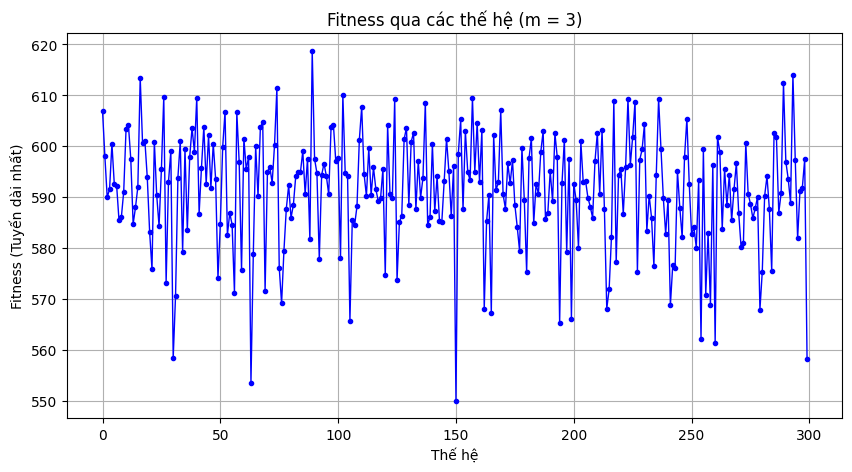


=== Số người (m) = 4 ===
Hội tụ tại thế hệ: 300
Tổng quãng đường: 1739.03
Tuyến dài nhất (fitness): 466.67
Chênh lệch giữa các tuyến (Balance metric): 28.94
Thời gian thực thi: 12.6621 giây
Tốc độ hội tụ: 0.0111 đơn vị/gen
- Tuyến 1 (412.77): [0, 112, 23, 20, 104, 64, 92, 95, 7, 50, 91, 85, 22, 44, 4, 69, 99, 111, 76, 101, 10, 15, 119, 48, 66, 123, 84, 56, 53, 107, 8, 57, 0]
- Tuyến 2 (459.79): [0, 29, 118, 3, 117, 100, 46, 34, 16, 73, 31, 26, 42, 115, 72, 27, 51, 116, 41, 89, 121, 125, 63, 86, 14, 24, 13, 36, 39, 38, 93, 114, 0]
- Tuyến 3 (466.67): [0, 11, 60, 47, 87, 122, 40, 124, 17, 103, 126, 94, 59, 70, 49, 83, 82, 2, 102, 96, 97, 79, 35, 75, 109, 113, 37, 33, 18, 9, 25, 106, 0]
- Tuyến 4 (399.80): [0, 30, 55, 61, 19, 74, 43, 77, 52, 1, 5, 90, 120, 32, 12, 6, 88, 62, 80, 98, 68, 45, 67, 110, 28, 65, 21, 71, 108, 78, 58, 105, 81, 54, 0]


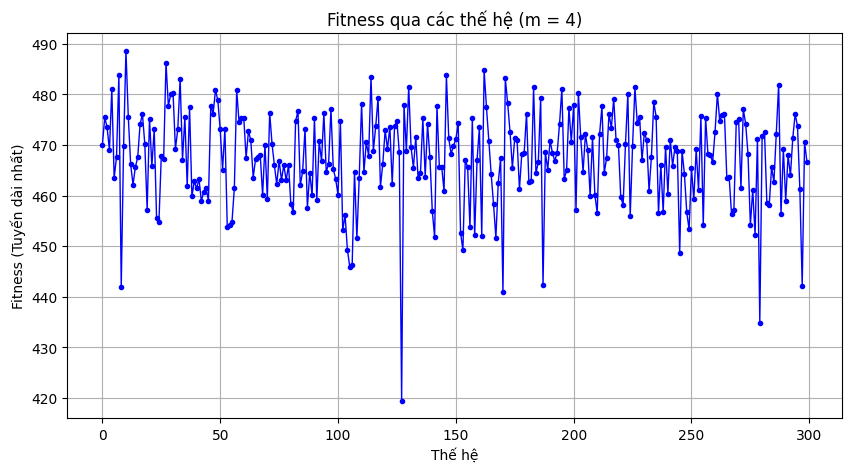


=== Số người (m) = 5 ===
Hội tụ tại thế hệ: 300
Tổng quãng đường: 1884.21
Tuyến dài nhất (fitness): 396.48
Chênh lệch giữa các tuyến (Balance metric): 14.07
Thời gian thực thi: 13.3548 giây
Tốc độ hội tụ: -0.0149 đơn vị/gen
- Tuyến 1 (396.48): [0, 91, 88, 74, 126, 44, 87, 10, 23, 55, 18, 6, 110, 102, 2, 112, 30, 1, 67, 103, 48, 105, 16, 101, 86, 40, 0]
- Tuyến 2 (366.92): [0, 116, 51, 89, 32, 34, 19, 15, 78, 12, 47, 96, 83, 53, 52, 122, 33, 120, 119, 26, 76, 20, 99, 27, 43, 90, 0]
- Tuyến 3 (359.82): [0, 77, 97, 22, 37, 106, 68, 65, 80, 56, 54, 8, 41, 13, 3, 104, 108, 84, 63, 28, 59, 38, 124, 69, 46, 100, 0]
- Tuyến 4 (390.24): [0, 17, 121, 11, 72, 58, 123, 92, 107, 61, 70, 81, 29, 118, 14, 79, 45, 125, 24, 42, 109, 21, 7, 71, 111, 36, 0]
- Tuyến 5 (370.75): [0, 85, 73, 75, 66, 64, 62, 93, 95, 114, 39, 25, 117, 50, 35, 49, 9, 94, 57, 4, 115, 31, 82, 5, 60, 113, 98, 0]


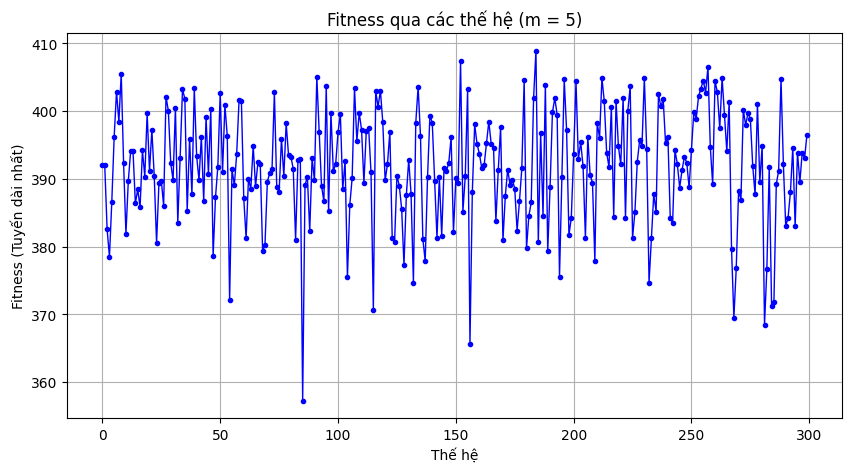

In [13]:
# Lặp qua các giá trị m từ 1 đến 5 (bạn có thể thay đổi phạm vi tùy ý)
for m in range(1, 6):
    print(f"\n=== Số người (m) = {m} ===")
    total_fitness, balance, routes, fitness_gen, exec_time = solve_nsga2(distance_matrix, m)

    total_distance = sum(calculate_route_distance([0] + r + [0], distance_matrix) for r in routes)
    converged_at = detect_convergence(fitness_gen)

    print(f"Hội tụ tại thế hệ: {converged_at}")
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất (fitness): {total_fitness:.2f}")
    print(f"Chênh lệch giữa các tuyến (Balance metric): {balance:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Tốc độ hội tụ: {round((fitness_gen[0] - fitness_gen[-1]) / len(fitness_gen), 4)} đơn vị/gen")


    for i, r in enumerate(routes):
        route_str = [0] + r + [0]
        length = calculate_route_distance(route_str, distance_matrix)
        print(f"- Tuyến {i+1} ({length:.2f}): {route_str}")

    # Trực quan hóa cho mỗi m
    plt.figure(figsize=(10, 5))
    plt.plot(fitness_gen, 'bo-', linewidth=1, markersize=3)
    plt.title(f'Fitness qua các thế hệ (m = {m})')
    plt.xlabel('Thế hệ')
    plt.ylabel('Fitness (Tuyến dài nhất)')
    plt.grid(True)
    plt.show()
